In [1]:
# Import pythons libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('tips.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
# Inspecting the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
# Statistical Analysis of the dataset
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
data.select_dtypes(include='object').nunique()

sex       2
smoker    2
day       4
time      2
dtype: int64

In [7]:
data['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [8]:
data['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [9]:
data['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
data['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

### Exploratory Data Analysis

<Axes: xlabel='sex', ylabel='count'>

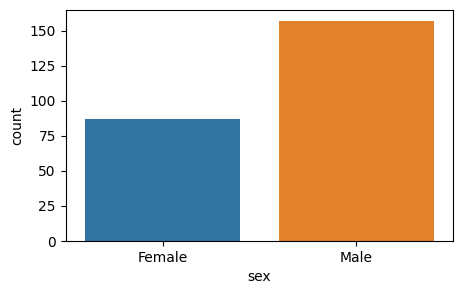

In [11]:
# Total customer by sex (gender)
plt.figure(figsize=(5,3))
sns.countplot(x=data['sex'])

<Axes: xlabel='day', ylabel='count'>

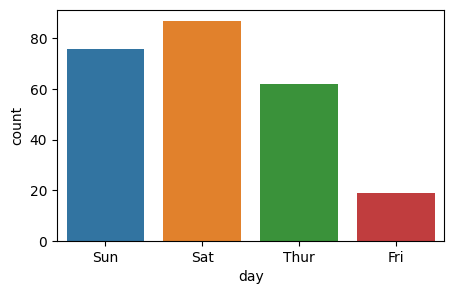

In [12]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['day'])

Text(0.5, 1.0, 'Total Tips')

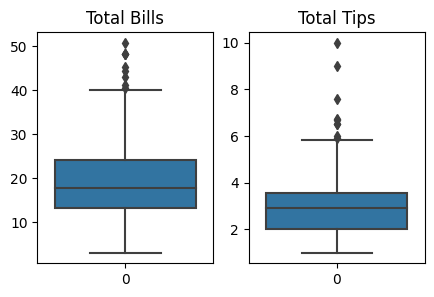

In [13]:
# Create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

# Create boxplot for columns and title
sns.boxplot(data['total_bill'], ax= axs[0])
axs[0].set_title('Total Bills')

sns.boxplot(data['tip'], ax=axs[1])
axs[1].set_title('Total Tips')

Text(0.5, 1.0, 'Total_tip by Sex')

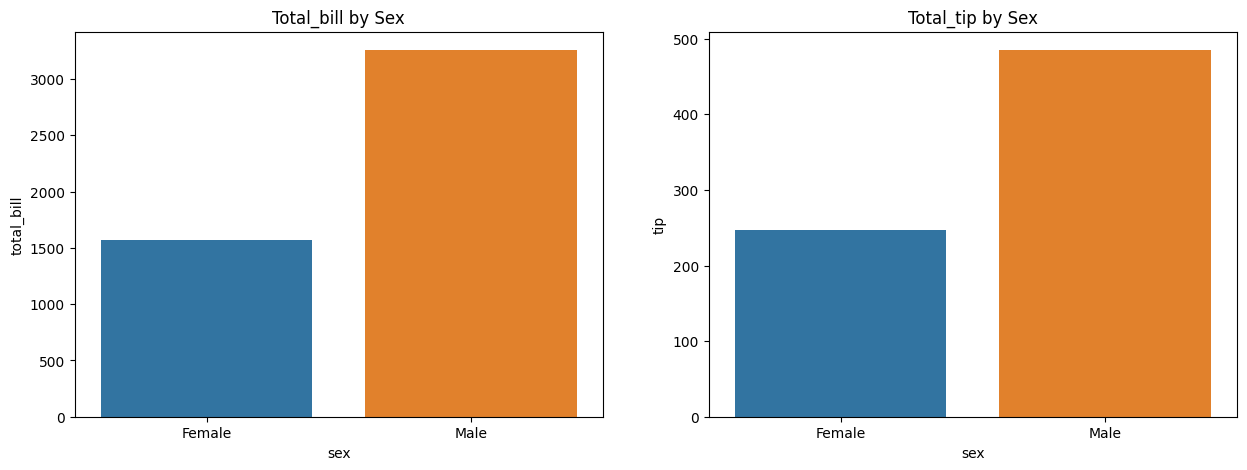

In [14]:
# Create figure for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Create barplot for columns and titles
total_billsex = data.groupby('sex')['total_bill'].sum().reset_index()
sns.barplot(x ='sex', y ='total_bill', data = total_billsex, ax=axes[0])
axes[0].set_title('Total_bill by Sex')

total_tipsex = data.groupby('sex')['tip'].sum().reset_index()
sns.barplot(x ='sex', y ='tip', data =total_tipsex, ax=axes[1])
axes[1].set_title('Total_tip by Sex')

<Axes: xlabel='total_bill', ylabel='tip'>

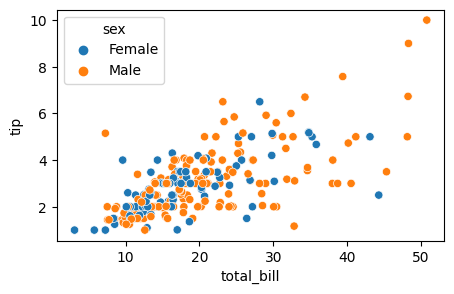

In [15]:
# Comparing the relationship between total_bill and tip by sex using scatter plot.
plt.figure(figsize=(5,3))
sns.scatterplot(x ='total_bill', y ='tip', hue ='sex', data = data)